
# Feature Screening

In [23]:
# NOTE: Installed dgufs directly in dir by traversing file tree.

import numpy as np
import pandas as pd

from dgufs.dgufs import DGUFS

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# sklearn.pipeline.FeatureUnion

In [2]:
data = pd.read_csv('./../../../data_source/to_analysis/sqroot_concat.csv', index_col=0)
data.head()

,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxis,original_shape_MajorAxis,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_Maximum3DDiameter,original_shape_MinorAxis,original_shape_Sphericity,...,PET_squareroot_gldm_SmallDependenceHighGrayLevelEmphasis.2,PET_squareroot_gldm_SmallDependenceLowGrayLevelEmphasis.2,PET_squareroot_ngtdm_Busyness.2,PET_squareroot_ngtdm_Coarseness.2,PET_squareroot_ngtdm_Complexity.2,PET_squareroot_ngtdm_Contrast.2,PET_squareroot_ngtdm_Strength.2,SUVpeak,MTV,TLG
patient,,,,,,,,,,,,,,,,,,,,,
2,0.738882,0.723925,27.060529,37.380273,41.976184,44.598206,42.720019,45.617979,27.619612,0.661532,...,55.990358,0.000296,0.396221,0.001304,359.034676,0.048375,3.373080,21.616549,7.384,124.870726
4,0.796900,0.629917,19.845151,31.504408,38.587563,35.468296,29.410882,38.704005,25.105855,0.701721,...,78.866121,0.000531,0.240726,0.002617,429.298421,0.092367,4.272454,15.296275,3.406,41.554406
5,0.600926,0.535140,22.515072,42.073251,46.065171,43.011626,32.015621,46.454279,25.282894,0.762365,...,53.827159,0.000350,0.364393,0.001373,329.113859,0.043783,3.556500,14.473272,7.934,86.228420
8,0.784571,0.414247,30.263897,73.057649,74.148500,80.956779,65.764732,83.438600,57.318945,0.520001,...,52.486259,0.000300,0.995336,0.000646,377.577327,0.074958,0.713911,10.510859,26.926,205.413389
10,0.690320,0.539743,19.449801,36.035312,33.286634,38.013156,33.015148,43.150898,24.875896,0.643822,...,56.735277,0.000300,0.186032,0.003398,412.821517,0.040755,4.079420,7.213190,6.041,32.103770


In [20]:
X = data.values
num_rounds = 10
num_features = np.arange(5, 300, 10, dtype=int)
# Obtain an initial ranking of features:
# ---------------------------------------
# The same features seems to be selected in for each number of features to 
# retain. However, the features selected with five or fifteen features on 
# the agenda may be considered higher ranked. Thus, by obtaining a vote
# for each time a feature have been selected would reveal which features are most
# important. Also, if a limited subset of features are selected in each round,
# this counld motivate a truncation of the feature set for reduced dimensionality.

In [21]:
votes = np.zeros(X.shape[1], dtype=int)
for num_to_select in num_features:
    dgufs = DGUFS(num_clusters=5, num_features=num_to_select)
    dgufs.fit(X)
    votes[dgufs.support] += 1

<BarContainer object of 295 artists>

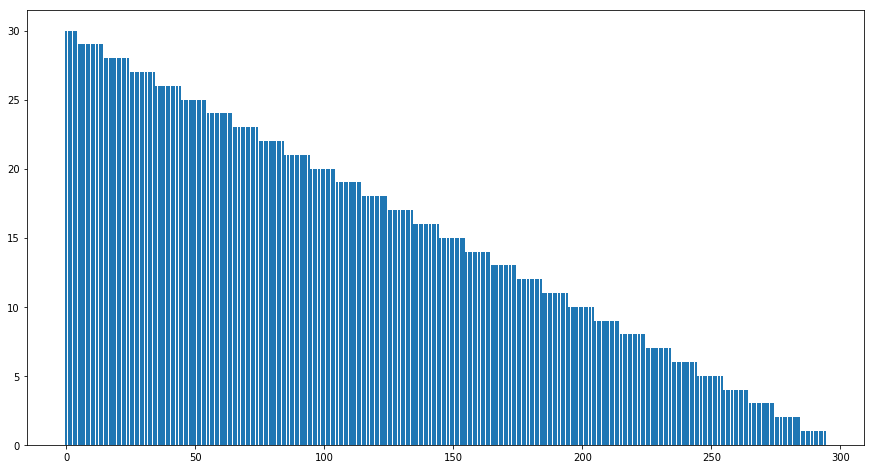

In [74]:
bars = sorted(votes[votes > 0], reverse=True)

plt.figure(figsize=(15, 8))
plt.bar(range(np.size(bars)), bars)

In [65]:
# The number of features never selected.
sum(votes == 0), sum(votes != 0), len(votes)

(312, 295, 607)

In [67]:
np.arange(5, 300, 10, dtype=int)

array([  5,  15,  25,  35,  45,  55,  65,  75,  85,  95, 105, 115, 125,
       135, 145, 155, 165, 175, 185, 195, 205, 215, 225, 235, 245, 255,
       265, 275, 285, 295])

In [84]:
top_n = np.unique(votes)[::-1][:5]
list(data.columns[votes > top_n[-1]])

['CT_squareroot_glszm_ZonePercentage',
 'CT_squareroot_gldm_SmallDependenceEmphasis',
 'CT_squareroot_gldm_SmallDependenceHighGrayLevelEmphasis',
 'CT_squareroot_gldm_SmallDependenceLowGrayLevelEmphasis',
 'CT_squareroot_ngtdm_Strength',
 'CT_squareroot_glszm_ZonePercentage.1',
 'CT_squareroot_gldm_SmallDependenceEmphasis.1',
 'CT_squareroot_gldm_SmallDependenceHighGrayLevelEmphasis.1',
 'CT_squareroot_gldm_SmallDependenceLowGrayLevelEmphasis.1',
 'CT_squareroot_ngtdm_Strength.1',
 'CT_squareroot_glszm_ZonePercentage.2',
 'CT_squareroot_gldm_SmallDependenceEmphasis.2',
 'CT_squareroot_gldm_SmallDependenceHighGrayLevelEmphasis.2',
 'CT_squareroot_gldm_SmallDependenceLowGrayLevelEmphasis.2',
 'CT_squareroot_ngtdm_Strength.2',
 'PET_squareroot_glszm_ZonePercentage',
 'PET_squareroot_gldm_SmallDependenceEmphasis',
 'PET_squareroot_gldm_SmallDependenceLowGrayLevelEmphasis',
 'PET_squareroot_ngtdm_Coarseness',
 'PET_squareroot_ngtdm_Contrast',
 'PET_squareroot_glrlm_LowGrayLevelRunEmphasis.1